# TASK 1


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [24]:
df = pd.read_csv("Q1.csv")

In [25]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [26]:
summary_statistics = df.describe()
print(summary_statistics)

       exam_score
count   50.000000
mean    68.735600
std      9.750143
min     48.730000
25%     62.040000
50%     68.390000
75%     74.630000
max     87.360000


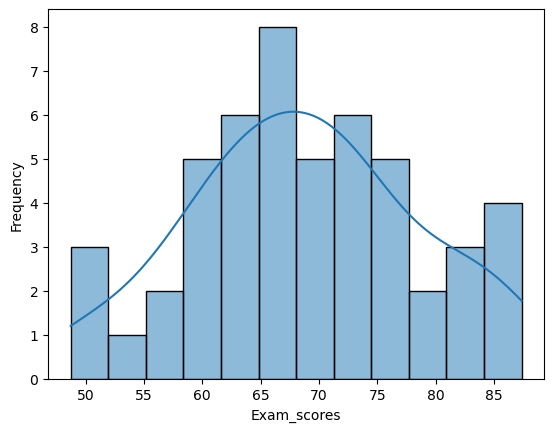

In [27]:
#Import the libraries

import matplotlib.pyplot as plt
import seaborn as sns

# customize the histogram
sns.histplot(df["exam_score"], bins=12, kde=True)
plt.xlabel("Exam_scores")
plt.ylabel("Frequency")
plt.show()

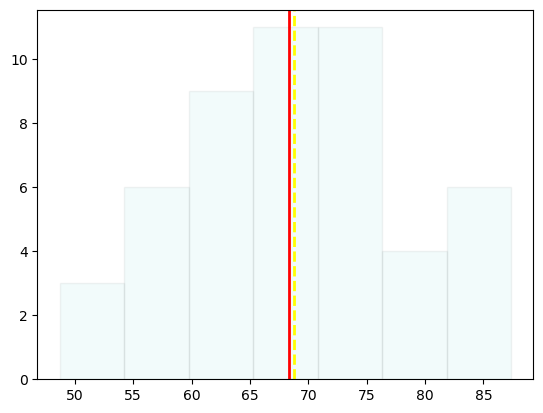

In [6]:
#Import the Libraries 
import matplotlib.pyplot as plt

#create the result to chart 
#bins allows to group data points based on ranges 
result = plt.hist(df, bins=7, color="c", edgecolor="k", alpha=0.05)# parameters for the histogram 
mu=68.39

#add in the popmean and Mu to see how far off the mean the predicted value is 
plt.axvline(df.mean().item(), color="yellow", linestyle="dashed", linewidth=2)  #this create a verticle line 
plt.axvline(mu,color="red", linestyle="solid", linewidth=2)#create the sample mean mu verticle line

In [28]:
# Perform a one-sample t-test
national_average = 70
alpha = 0.05

t_stat, p_value = stats.ttest_1samp(df['exam_score'], national_average)

# Output the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the students' performance is below the national average.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the students' performance is below the national average.")


T-statistic: -0.9169771399834613
P-value: 0.36364597032062806
Fail to reject the null hypothesis. There is no significant evidence that the students' performance is below the national average.


# TASK 2

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind

In [36]:
df = pd.read_csv("diamonds.csv")

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
# Create a new binary variable "colourless"
df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

In [39]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [40]:
df_new = df.drop(['color'], axis=1)


In [41]:
df_new.head()

,carat,cut,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [42]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
df_new.head()

,carat,cut,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
df_new.clarity = le.fit_transform(df_new.clarity)

In [77]:
df_new.head()

,carat,cut,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,3,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,2,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,4,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,5,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,3,63.3,58.0,335,4.34,4.35,2.75,0


In [47]:
df_new.mean()

C:\Users\karik\AppData\Local\Temp\ipykernel_16444\1212866955.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.mean()


carat            0.797940
clarity          3.835150
depth           61.749405
table           57.457184
price         3932.799722
x                5.731157
y                5.734526
z                3.538734
colourless       0.484131
dtype: float64

In [48]:
# Hypothesis test
stats.f_oneway(
*(df_new.loc[df_new['clarity']==clarity, 'colourless'] for clarity in df_new['clarity'].unique()))

F_onewayResult(statistic=70.11822509866312, pvalue=2.2286936134194793e-101)

In [49]:
tukey = pairwise_tukeyhsd(endog=df_new['clarity'],
                         groups=df_new['colourless'],
                         alpha=0.01)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0405 0.0064 0.0022 0.0788   True
--------------------------------------------------


The hypothesys will we rejected.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

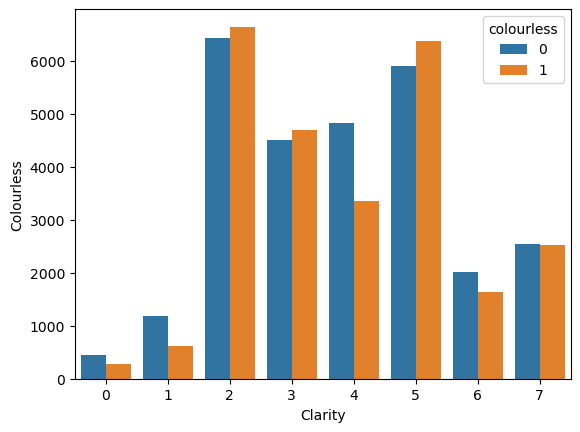

In [52]:
import matplotlib.pyplot as plt

sns.countplot(data=df_new,x='clarity',hue='colourless')
plt.xlabel("Clarity")
plt.ylabel("Colourless")
plt.show()

Color has more variance than Colourless

In [94]:
#  Firstly, lets separate data for colorless and non-colorless diamonds regarding price
from scipy.stats import t

colorless_prices = df_new[df_new['colourless'] == 1]['price']
non_colorless_prices =df_new[df_new['colourless'] == 0]['price']

# Calculate mean and standard deviation for colorless diamonds
mean_colorless = colorless_prices.mean()
std_colorless = colorless_prices.std()

# Calculate mean and standard deviation for non-colorless diamonds
mean_non_colorless = non_colorless_prices.mean()
std_non_colorless = non_colorless_prices.std()

# Set confidence level
confidence_level = 0.90

# Calculate margin of error for colorless diamonds
n_colorless = len(colorless_prices)
t_value_colorless = t.ppf((1 + confidence_level) / 2, df=n_colorless - 1)
margin_error_colorless = t_value_colorless * (std_colorless / np.sqrt(n_colorless))

# Calculate margin of error for non-colorless diamonds
n_non_colorless = len(non_colorless_prices)
t_value_non_colorless = t.ppf((1 + confidence_level) / 2, df=n_non_colorless - 1)
margin_error_non_colorless = t_value_non_colorless * (std_non_colorless / np.sqrt(n_non_colorless))

# Calculate confidence intervals
ci_colorless = (mean_colorless - margin_error_colorless, mean_colorless + margin_error_colorless)
ci_non_colorless = (mean_non_colorless - margin_error_non_colorless, mean_non_colorless + margin_error_non_colorless)

# Print confidence intervals
print(f"90% Confidence Interval for the Mean Price of Colorless Diamonds: {ci_colorless}")
print(f"90% Confidence Interval for the Mean Price of Non-Colorless Diamonds: {ci_non_colorless}")

90% Confidence Interval for the Mean Price of Colorless Diamonds: (3301.8575158790077, 3373.6612862960706)
90% Confidence Interval for the Mean Price of Non-Colorless Diamonds: (4448.778068284649, 4533.682076903305)


# TASK 3 

In [4]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pydataset import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
# Load the PlantGrowth dataset
plants = data('PlantGrowth')

In [11]:
#Show the rows
print(plants.head(10))

    weight group
1     4.17  ctrl
2     5.58  ctrl
3     5.18  ctrl
4     6.11  ctrl
5     4.50  ctrl
6     4.61  ctrl
7     5.17  ctrl
8     4.53  ctrl
9     5.33  ctrl
10    5.14  ctrl


In [12]:
plants.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [13]:
# Summary statistics by treatment
summary_by_treatment = plants.groupby('group')['weight'].describe()

print("\nSummary Statistics by Treatment:")
print(summary_by_treatment)


Summary Statistics by Treatment:
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


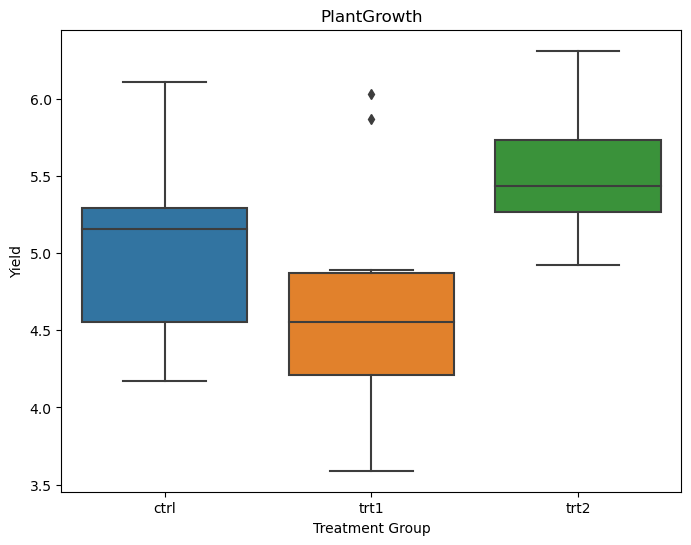

In [78]:
# Create a boxplot to summarize the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=plants)
plt.title('PlantGrowth')
plt.xlabel('Treatment Group')
plt.ylabel('Yield')
plt.show()

The boxplot provides a visual summary of the distribution of yields for each treatment group, helping to identify differences and patterns in the data.

In [19]:
# One-way ANOVA
from pydataset import data
from scipy.stats import f_oneway
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
# Perform one-way ANOVA
stat, p = f_oneway(plants['weight'][plants['group'] == 'ctrl'],
                   plants['weight'][plants['group'] == 'trt1'],
                   plants['weight'][plants['group'] == 'trt2'])


In [21]:
# Display p-value
print("p-value:", p)

# Check for significance using a significance level of alpha = 0.05
if p < 0.05:
    print("Hypothesis Rejected: There is evidence of a difference between the means.")
else:
    print("Hypothesis Accepted: There is no significant evidence of a difference between the means.")

p-value: 0.0159099583256229
Hypothesis Rejected: There is evidence of a difference between the means.


In [130]:
# Perform one-way ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pydataset import data

In [131]:
formula = 'weight ~ group'
model = ols(formula, data=plant_growth).fit()
anova_results = anova_lm(model)

   weight group
1    4.17  ctrl
2    5.58  ctrl
3    5.18  ctrl
4    6.11  ctrl
5    4.50  ctrl

Reject the null hypothesis. There is evidence of a difference between the means (p-value: 0.0159)

Tukey's HSD Post Hoc Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


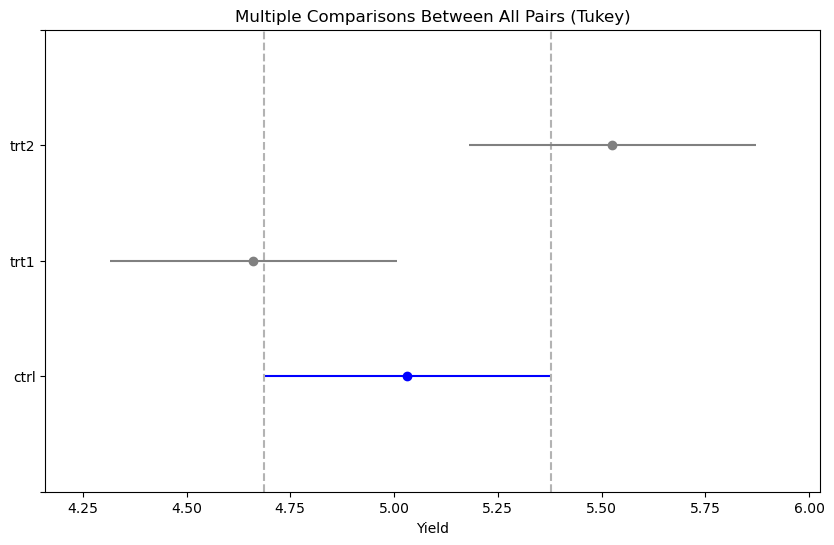

In [137]:
# Install the necessary libraries if you haven't already
# !pip install pandas statsmodels pydataset

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pydataset import data

# Load the PlantGrowth dataset
plant_growth = data('PlantGrowth')

# Display the first few rows of the dataset
print(plant_growth.head())

# Perform one-way ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'weight ~ group'
model = ols(formula, data=plant_growth).fit()
anova_results = anova_lm(model)

# Check for significance using a significance level of alpha = 0.05
alpha = 0.05
p_value = anova_results['PR(>F)'][0]

if p_value < alpha:
    print(f"\nReject the null hypothesis. There is evidence of a difference between the means (p-value: {p_value:.4f})")

    # Perform Tukey's HSD post hoc test
    tukey_results = pairwise_tukeyhsd(plant_growth['weight'], plant_growth['group'])
    print("\nTukey's HSD Post Hoc Test Results:")
    print(tukey_results.summary())
    
    # Plot Tukey's HSD results
    tukey_results.plot_simultaneous(comparison_name='ctrl', xlabel='Yield')
    plt.show()
else:
    print(f"\nFail to reject the null hypothesis. There is no significant evidence of a difference between the means (p-value: {p_value:.4f})")

In this code:

We first perform one-way ANOVA to determine if there is a significant difference between the means.
If the ANOVA indicates a significant difference, we then perform Tukey's HSD post hoc test to identify specific group differences.
The Tukey's HSD results are displayed, including confidence intervals and p-values for each pairwise comparison.
A plot of Tukey's HSD results is also provided for visualization.
Examine the Tukey's HSD results to identify which groups have significantly different means. If the confidence interval for a pairwise comparison does not include zero and the p-value is less than the chosen significance level (e.g., 0.05), it suggests a significant difference between those groups.

# TASK 4

In [80]:
from pydataset import data
from scipy.stats import pearsonr  # Corrected import

In [81]:
# Download the file
trees = data('trees')

In [82]:
print(trees.head(20))

    Girth  Height  Volume
1     8.3      70    10.3
2     8.6      65    10.3
3     8.8      63    10.2
4    10.5      72    16.4
5    10.7      81    18.8
6    10.8      83    19.7
7    11.0      66    15.6
8    11.0      75    18.2
9    11.1      80    22.6
10   11.2      75    19.9
11   11.3      79    24.2
12   11.4      76    21.0
13   11.4      76    21.4
14   11.7      69    21.3
15   12.0      75    19.1
16   12.9      74    22.2
17   12.9      85    33.8
18   13.3      86    27.4
19   13.7      71    25.7
20   13.8      64    24.9


In [83]:
correlation_matrix = trees.corr()

In [84]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000


In [85]:
# Perform hypothesis tests for the population correlation coefficients
# Calculate correlation coefficient and p-value for diameter and height
corr_diameter_height, p_value_diameter_height = pearsonr(trees['Girth'], trees['Height'])

In [86]:
# Calculate correlation coefficient and p-value for diameter and volume
corr_diameter_volume, p_value_diameter_volume = pearsonr(trees['Girth'], trees['Volume'])


In [87]:
# Calculate correlation coefficient and p-value for height and volume
corr_height_volume, p_value_height_volume = pearsonr(trees['Height'], trees['Volume'])

In [88]:
# Display the results
print("\nHypothesis tests results:")
print(f"Correlation coefficient between Girth and Height: {corr_diameter_height:.4f}, p-value: {p_value_diameter_height:.4f}")
print(f"Correlation coefficient between Girth and Volume: {corr_diameter_volume:.4f}, p-value: {p_value_diameter_volume:.4f}")
print(f"Correlation coefficient between Height and Volume: {corr_height_volume:.4f}, p-value: {p_value_diameter_volume:.4f}")


Hypothesis tests results:
Correlation coefficient between Girth and Height: 0.5193, p-value: 0.0028
Correlation coefficient between Girth and Volume: 0.9671, p-value: 0.0000
Correlation coefficient between Height and Volume: 0.5982, p-value: 0.0000


In [89]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from pydataset import data

<Axes: >

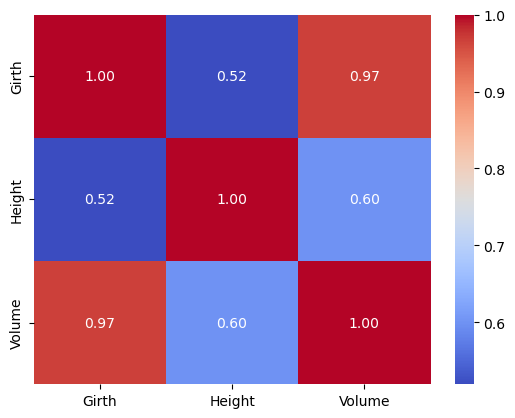

In [90]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [67]:
# Install the necessary libraries if you haven't already
# !pip install pandas statsmodels pydataset

import pandas as pd
import statsmodels.api as sm
from pydataset import data

In [68]:
# Define the independent variable (X) and the dependent variable (y)
X_girth = sm.add_constant(trees['Girth'])
X_height = sm.add_constant(trees['Height'])
X_both = sm.add_constant(trees[['Girth', 'Height']])
y = trees['Volume']

In [69]:
# Perform regression analysis for girth
model_girth = sm.OLS(y, X_girth).fit()
print("\nRegression Results for Girth:")
print(model_girth.summary())


Regression Results for Girth:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           8.64e-19
Time:                        14:19:25   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435

In [70]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from pydataset import data

In [71]:
# Perform regression analysis for girth
model_girth = sm.OLS(y, X_girth).fit()

# Perform regression analysis for height
model_height = sm.OLS(y, X_height).fit()

# Perform regression analysis for both girth and height
model_both = sm.OLS(y, X_both).fit()

# Create a meshgrid for Girth and Height
Girth_grid, Height_grid = np.meshgrid(np.linspace(trees['Girth'].min(), trees['Girth'].max(), 100),
                                       np.linspace(trees['Height'].min(), trees['Height'].max(), 100))

# Flatten the grids for prediction
X_pred = pd.DataFrame({'Girth': Girth_grid.flatten(), 'Height': Height_grid.flatten()})
X_pred = sm.add_constant(X_pred)

# Predict the values for the surface plot
predicted_volume = model_both.predict(X_pred)

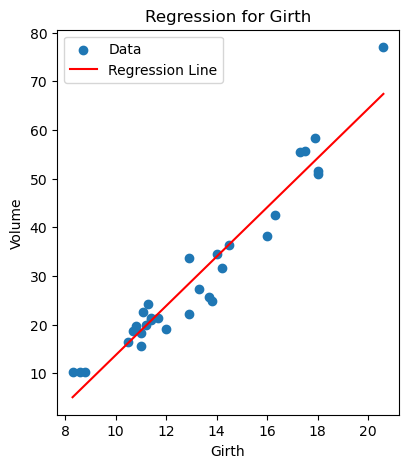

In [72]:
# Reshape the predicted values for the surface plot
Z = predicted_volume.values.reshape(Girth_grid.shape)

# Plot the regression lines and surface
fig = plt.figure(figsize=(15, 5))

# Plot for Girth
ax1 = fig.add_subplot(131)
ax1.scatter(trees['Girth'], y, label='Data')
ax1.plot(trees['Girth'], model_girth.predict(X_girth), color='red', label='Regression Line')
ax1.set_title('Regression for Girth')
ax1.set_xlabel('Girth')
ax1.set_ylabel('Volume')
ax1.legend()

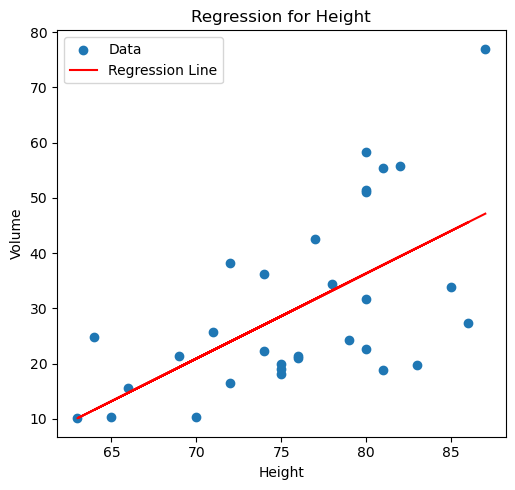

In [73]:
# Reshape the predicted values for the surface plot
Z = predicted_volume.values.reshape(Girth_grid.shape)

# Plot the regression lines and surface
fig = plt.figure(figsize=(15, 5))

# Plot for Height
ax2 = fig.add_subplot(132)
ax2.scatter(trees['Height'], y, label='Data')
ax2.plot(trees['Height'], model_height.predict(X_height), color='red', label='Regression Line')
ax2.set_title('Regression for Height')
ax2.set_xlabel('Height')
ax2.set_ylabel('Volume')
ax2.legend()


plt.tight_layout()
plt.show()